In [10]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

import numpy as np

%matplotlib inline

# Question 1

In [3]:
national_collapse = pd.read_csv('national_collapse.csv')
print(f"Header: {national_collapse.head()}")
print(f"Races: {set(national_collapse['kid_race'])}")
national_collapse.isnull().values.any()

Header:    par_pctile kid_race gender  n_kir        kir
0           1    White      F  34000  32.930000
1           1    White      M  36000  38.959999
2           1    Black      F  29500  33.860001
3           1    Black      M  29000  29.440001
4           1    Asian      F   4300  50.080002
Races: {'Black', 'White', 'AIAN', 'Hispanic', 'Asian'}


False

## Aggregate across racial groups

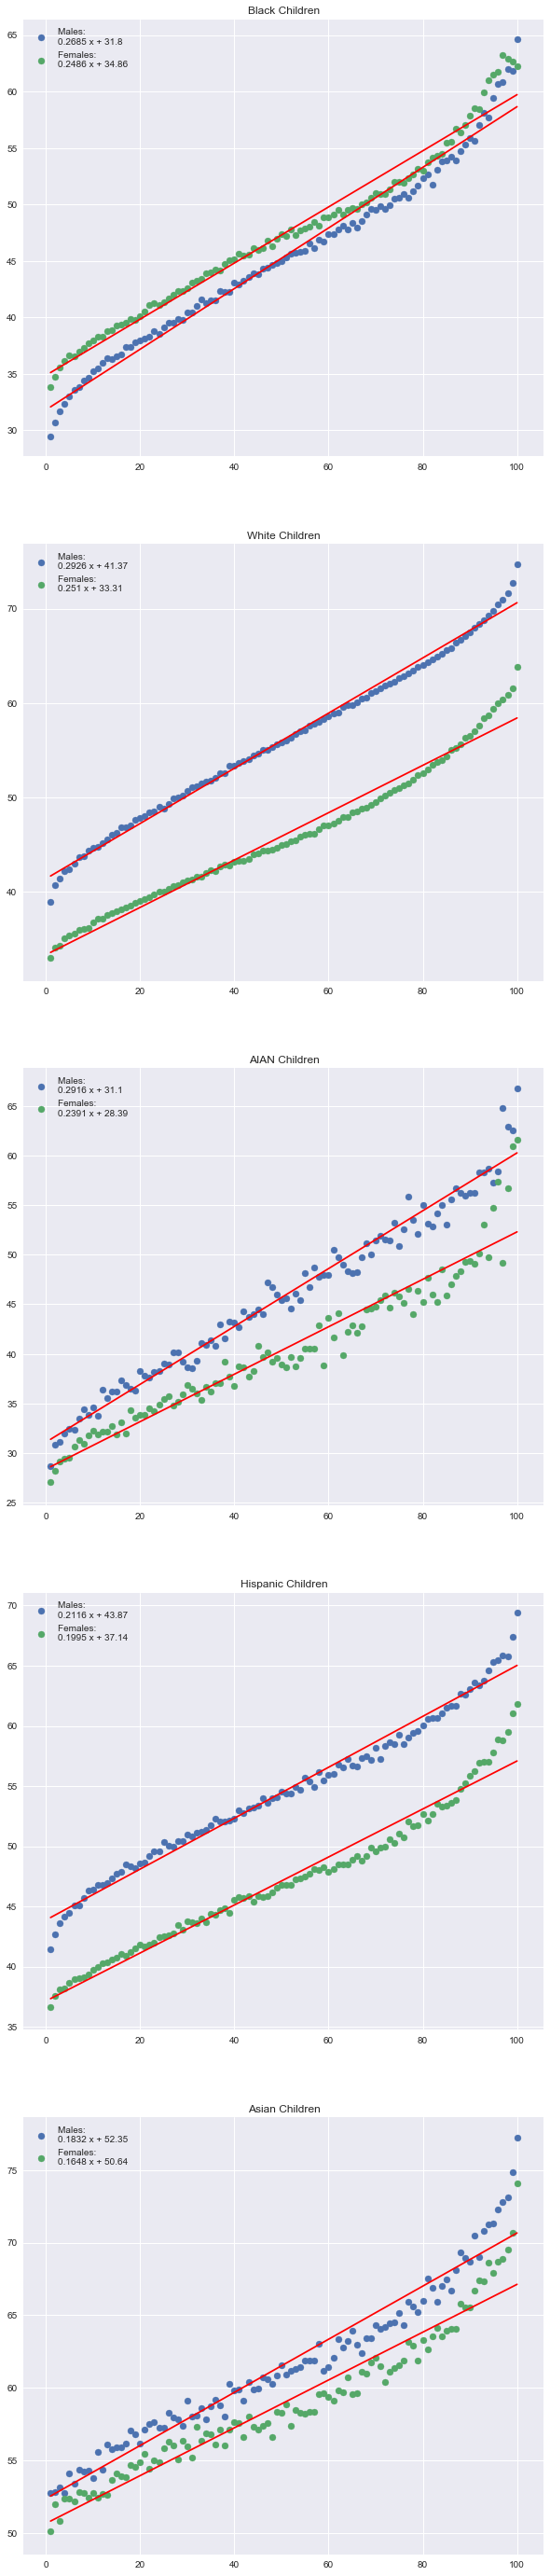

In [33]:
races = list(set(national_collapse['kid_race']))

f, axes = plt.subplots(len(races),1, figsize=(10,50))

for i, race in enumerate(races):
    males = national_collapse[(national_collapse.kid_race == race) & (national_collapse.gender == 'M')]
    females = national_collapse[(national_collapse.kid_race == race) & (national_collapse.gender == 'F')]
    
    male_fit = np.poly1d(np.polyfit(x=males.par_pctile, y=males.kir, deg=1))
    female_fit = np.poly1d(np.polyfit(x=females.par_pctile, y=females.kir, deg=1))
    
    axes[i].scatter(males.par_pctile, males.kir, label='Males: ' + str(male_fit))
    axes[i].scatter(females.par_pctile, females.kir, label='Females: ' + str(female_fit))
    axes[i].legend()
    axes[i].set_title(race + " Children")

    axes[i].plot(males.par_pctile, male_fit(males.par_pctile), color='r')
    axes[i].plot(females.par_pctile, female_fit(females.par_pctile), color='r')
    

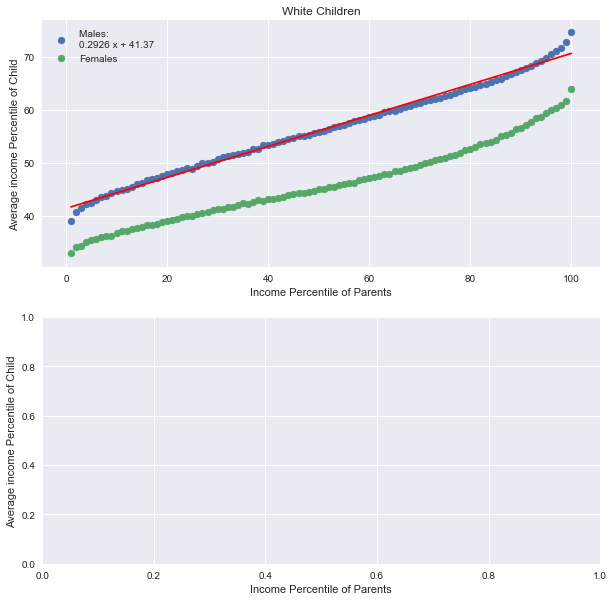

In [22]:
# White children
white_males = national_collapse[(national_collapse.kid_race == 'White') & (national_collapse.gender == 'M')]
white_females = national_collapse[(national_collapse.kid_race == 'White') & (national_collapse.gender == 'F')]

f, axes = plt.subplots(2,1, figsize=(10,10))

z = np.polyfit(x=white_males.par_pctile, y=white_males.kir, deg=1)
p = np.poly1d(z)

axes[0].scatter(white_males.par_pctile, white_males.kir, label='Males: ' + str(p))
axes[0].scatter(white_females.par_pctile, white_females.kir, label='Females')
axes[0].legend()
axes[0].set_title("White Children")

axes[0].plot(white_males.par_pctile, p(white_males.par_pctile), color='r')

for arr in axes:
    arr.set(xlabel='Income Percentile of Parents', ylabel='Average income Percentile of Child')